# **Intro to SiS1 Labs**

The goal of the labs of Signal and Systems 1 is to gain knowledge on the course’s topics by solving a specific signal processing problem. By the end of the course, you should be able to imitate, by synthesis, the sound produced by a plucked string instrument using the knowledge acquired in the theory and seminar classes. This will be a cumulative process, in each lab new techniques will be applied in order to improve the synthesis. First let's show what we will achieve by the end of the course. For each lab we need to import some auxiliary functions needed to load the audio files and listen to them:


In [1]:
from util import load_audio, save_audio, plot_signals
from IPython.display import Audio

**Reference signal**

Now let's load and listen to a reference signal like the one you will use:

In [2]:
reference, fs = load_audio('audio/reference.wav')
Audio(reference, rate=fs)

**Synthesis**

Now we can load and listen to a synthesised signal like the one you will obtain and that tries to imitate the reference signal. This is an audio signal created from scratch only using the knowledge gained during the course.

In [3]:
synthesis, fs = load_audio('audio/synthesis.wav')
Audio(synthesis, rate=fs)

---

## **Lab 1**
In this lab you will choose your reference sound to be used for all the labs and start imitating it with a single sinusoid.

## **Exercises**

**1. Choose a reference sound**

1.1. Find a recording of a single plucked string sound. Be creative, do not choose “guitar” by default, nor copy a sound from another group. You should use [Freesound](https://freesound.org/) to find the recordings (Freesound is a huge collaborative database of audio snippets released under Creative Commons licenses created and maintained by researchers of the Music Technology Group of the UPF). Try to find a sound with the best possible quality. The ideal sound format should be: uncompress (such as.wav, .aiff, but no .mp3), mono (one channel) and with a sampling rate of  44100Hz. The sound file should also contain a single note. You can start by downloading a sound from freesound and modify it with Audacity to the right format and content.

[Put here the freesound link to the selected sound recording]

https://freesound.org/people/aabbccddee123/sounds/469962/

1.2. Create a github repository and upload your edited audio file there:

1) Sing up to github using your UPF gmail account: https://github.com/

2) Create a repository called **sis1_groupX** where X is your group number: https://docs.github.com/en/get-started/quickstart/create-a-repo

3) Upload your edited audio file to the repository


1.3. Now you can clone your repository and access the audio file locally. Change the following code (user name and file name) to clone the repository and load the audio file.

In [ ]:
!git clone https://github.com/martinagallemi01/sis1_group102.git
filepath = "./sis1_group102/3471__noisecollector__as4.wav"
ref, fs = load_audio(filepath)

Note that `load_audio` function returns two variables: the audio signal (as a one dimensional array of floating point numbers), and the sampling rate (as a integer number). Now we can plot the audio signal:

In [5]:
plot_signals(ref, fs)

You can use the zoom in tool to see more details.

You can also use Audio widget to listen the audio signal:

In [6]:
Audio(ref, rate=fs)



---



**2. Measure the signal period and fundamental frequency**

2.1. Measure the period length, in seconds, and the fundamental frequency, in Hz, of the sound you choose. You can use Audacity to measure the period by zooming into a stable portion of the sound. Then compute its inverse to find the fundamental frequency. Find the closest note (note name) of the measured frequency (use google).

[Write here the note name and the fundamental frequency in hertz]

2.2. Calculate the period from the frequency value using Python:


In [7]:
#this is the period I measured manually in Audacity from a stable portion of the waveform
T = 0.0027  # seconds

#the frequency (Hz)
f = 1 / T

print(f"Manual period (from Audacity): {T:.7f} s")
print(f"Calculated frequency: {f:.2f} Hz")

print(f"The note corresponding to this frequency is approximately between Fa: 350 Hz and Sol: 390 Hz.")



Manual period (from Audacity): 0.0027000 s
Calculated frequency: 370.37 Hz
The note corresponding to this frequency is approximately between Fa: 350 Hz and Sol: 390 Hz.


2.3. Plot three periods of the signal using the `plot_signals` function and selecting `t_start` and `t_end` arguments accordingly. Try to get the first periods of the audio signal but avoiding the attack section.

In [8]:
t_start = 0.014308  
t_end = t_start + 3 * T   # 3 periods

#plot three periods of the stable portion
plot_signals(ref, fs, t_start, t_end)

2.4. Measure the period of the signal manually by identifying the begining and ending of a periodic cycle. Note that when you hover the mouse over one of the points in the plot, you can see the time and amplitude values. For instance, you can check the cross by zero.

first_peak = 0.014308  
second_peak = 0.01699  

T = second_peak - first_peak = 0,002682

f = 1 / T = 372,85 Hz

2.5. Do the measured (2.4) and theoretical (2.2) periods coincide? If not, explain why.

The theoretical (2.2) is 0.0027s while the measured (2.4) is 0.002682 so I can say that they are really close, so they coincide.



---



**3. Generating a sinusoid**

3.1. Create a sinusoid of the same duration than the reference signal and same frequency than the fundamental frequency. Plot it along with the audio signal of the reference recording. Plot the same time segment that 2.3. Note that the sampling rate should be the same for both signals. Try to find the values of Amplitude and initial Phase that make the two signal segments plotted to match as close as possible (do not attempt to imitate the whole signal). Matching the phase is a bit tricky.



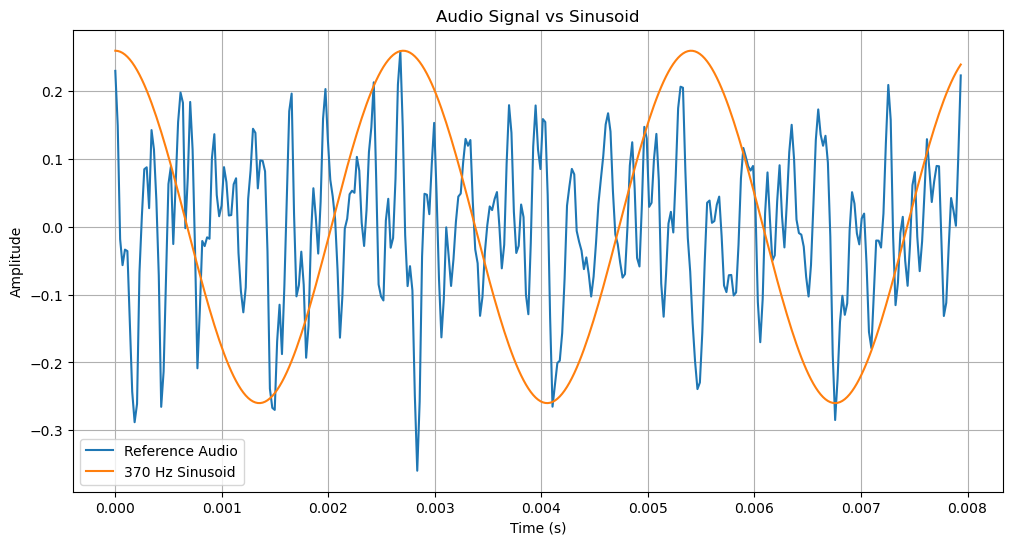

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


audio_path = "./sis1_group102/3471__noisecollector__as4.wav"  
reference_signal, sampling_rate = librosa.load(audio_path, sr=44100)


start_time = 0.01430866
end_time = 0.02226799
duration = end_time - start_time


start_sample = int(start_time * sampling_rate)
end_sample = int(end_time * sampling_rate)
reference_segment = reference_signal[start_sample:end_sample]

#my sinusoid
fundamental_freq = 370
t = np.linspace(0, duration, len(reference_segment), endpoint=False)
sinusoid = 0.26*np.cos(2 * np.pi * fundamental_freq * t)


plt.figure(figsize=(12, 6))
plt.plot(t, reference_segment, label='Reference Audio')
plt.plot(t, sinusoid, label='370 Hz Sinusoid')
plt.title('Audio Signal vs Sinusoid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

3.2. What are the main differences between the two signals.

Alright, so looking at the graph, the main difference is that the sinusoid I created is clean and simple compared to the actual reference audio. The reference audio has not smooth waves. Between each of the main peaks, you can see the reference audio has a bunch of smaller ups and downs, probably because of the noise of the environment it was recorded. Overall, the sinusoid has regular peaks while the reference audio has many more small oscillations between the main peaks.



3.3. Listen to the synthesized signal usign the Audio widget. Sounds natural?

In [10]:
from IPython.display import Audio

long_duration = 1.0
t_long = np.linspace(0, long_duration, int(sampling_rate * long_duration), endpoint=False)
sinusoid_long = 0.25 * np.cos(2 * np.pi * fundamental_freq * t_long)

Audio(sinusoid_long, rate=sampling_rate)

3.4. Save the synthesized signal using the 'save_audio` function:

In [12]:
mysinusoid = np.column_stack((sinusoid_long, sinusoid_long))

save_audio("synthesized_sinusoid.wav", mysinusoid, sampling_rate)